In [2]:
from google.colab import drive
import os
import pandas as pd
import glob
import numpy as np

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
datasets_path = "/content/drive/My Drive/Datasets/"
csv_files = glob.glob(os.path.join(datasets_path, "*.csv.gz"))+ glob.glob(os.path.join(datasets_path, "*.csv"))
dfs = [pd.read_csv(file) for file in csv_files]


In [5]:
df_all = pd.concat(dfs, ignore_index=True)

df_all.head()

,TICKER,ULTIMATE_PARENT_NAME,ISSUER_NAME,ISSUER_LEI,BONDDROID_INDUSTRY,BONDDROID_SECTOR,COUNTRY_OF_RISK,REGION,BOND_DESCRIPTION,FIGI,...,TRIGGER_TIMESTAMP,TRIGGER_TYPE,ERROR_MEDIAN_OAS_30,DOS_OAS_BID,DOS_OAS_ASK,IS_CLOSE,SOS_OAS_BID,SOS_OAS_ASK,DURATION_MID,CONVEXITY_MID
0,ABBV,ABBVIE INC.,ABBVIE INC.,FR5LCKFTG8054YNNRU85,"Research and Development in the Physical, Engi...","Professional, Scientific, and Technical Services",United States of America,North America,ABBV 3.2 2026-05-14,BBG00CW1BPK5,...,2020-08-31 15:55:24.989,trace_primary,1.949,0.054397,0.056549,NaN,0.054397,0.056549,5.236254,0.289845
1,ABBV,ABBVIE INC.,ABBVIE INC.,FR5LCKFTG8054YNNRU85,"Research and Development in the Physical, Engi...","Professional, Scientific, and Technical Services",United States of America,North America,ABBV 3.2 2026-05-14,BBG00CW1BPK5,...,2020-08-31 16:14:14.041,trace_primary,1.949,0.039458,0.041019,NaN,-0.014168,-0.014698,5.236448,0.289859
2,ABBV,ABBVIE INC.,ABBVIE INC.,FR5LCKFTG8054YNNRU85,"Research and Development in the Physical, Engi...","Professional, Scientific, and Technical Services",United States of America,North America,ABBV 3.2 2026-05-14,BBG00CW1BPK5,...,2020-08-31 16:32:34.960,trace_primary,2.219,-0.016509,-0.017162,NaN,-0.053843,-0.055889,5.237175,0.289910
3,HNDA,"HONDA MOTOR CO., LTD.",AMERICAN HONDA FINANCE CORPORATION,B6Q2VFHD1797Q7NZ3E43,Sales Financing,Finance and Insurance,United States of America,North America,HNDA None 2021-02-12,BBG00K1XYZS6,...,2020-08-31 18:11:04.057,trace_primary,8.324,NaN,NaN,NaN,NaN,NaN,0.443368,0.004177
4,HNDA,"HONDA MOTOR CO., LTD.",AMERICAN HONDA FINANCE CORPORATION,B6Q2VFHD1797Q7NZ3E43,Sales Financing,Finance and Insurance,United States of America,North America,HNDA None 2021-02-12,BBG00K1XYZS6,...,2020-08-31 18:12:49.562,trace_primary,8.324,NaN,NaN,NaN,-0.078337,-0.085382,0.443434,0.004178


In [6]:
df_all['BONDDROID_SECTOR'].value_counts()

,count
BONDDROID_SECTOR,
Manufacturing,529254
Finance and Insurance,392005
Information,250647
"Mining, Quarrying, and Oil and Gas Extraction",143377
Retail Trade,96412
Real Estate and Rental and Leasing,72612
"Professional, Scientific, and Technical Services",68445
Transportation and Warehousing,66986
Wholesale Trade,26985


In [7]:
df_man = df_all[df_all['BONDDROID_SECTOR']== 'Manufacturing']
# df_man

In [8]:
selected_cols = [
    'TICKER', 'ISSUER_NAME', 'BID_PRICE', 'COUPON', 'COUPON_TYPE', 'CURRENCY', 'MATURITY', 'ASK_PRICE', 'BID_YIELD', 'ASK_YIELD',
    'T_BENCHMARK', 'BID_SOT', 'ASK_SOT', 'BID_OAS', 'ASK_OAS', 'DOS_OAS_BID', 'DOS_OAS_ASK', 'TIME_SINCE_LAST_TRADE',
    'TIMES_TRADED_60', 'AVG_DAILY_TRADE_COUNT_60', 'SIGNAL_TIMESTAMP', 'RATES_TIMESTAMP', 'MARKET_SEGMENT',
    'TRIGGER_TIMESTAMP', 'TRIGGER_TYPE', 'IS_CLOSE','DURATION_MID','CONVEXITY_MID'
]
df = df_man[selected_cols]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 529254 entries, 23 to 1742531
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TICKER                    529254 non-null  object 
 1   ISSUER_NAME               529254 non-null  object 
 2   BID_PRICE                 529254 non-null  float64
 3   COUPON                    529254 non-null  float64
 4   COUPON_TYPE               529254 non-null  object 
 5   CURRENCY                  529254 non-null  object 
 6   MATURITY                  529254 non-null  object 
 7   ASK_PRICE                 529254 non-null  float64
 8   BID_YIELD                 529254 non-null  float64
 9   ASK_YIELD                 529254 non-null  float64
 10  T_BENCHMARK               529254 non-null  object 
 11  BID_SOT                   529254 non-null  float64
 12  ASK_SOT                   529254 non-null  float64
 13  BID_OAS                   529254 non-null  floa

In [10]:
df_info = df.info()
df_head = df.head()

# Check for missing values
missing_values = df.isnull().sum()
df_info, df_head, missing_values[missing_values < df.shape[0]]

<class 'pandas.core.frame.DataFrame'>
Index: 529254 entries, 23 to 1742531
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TICKER                    529254 non-null  object 
 1   ISSUER_NAME               529254 non-null  object 
 2   BID_PRICE                 529254 non-null  float64
 3   COUPON                    529254 non-null  float64
 4   COUPON_TYPE               529254 non-null  object 
 5   CURRENCY                  529254 non-null  object 
 6   MATURITY                  529254 non-null  object 
 7   ASK_PRICE                 529254 non-null  float64
 8   BID_YIELD                 529254 non-null  float64
 9   ASK_YIELD                 529254 non-null  float64
 10  T_BENCHMARK               529254 non-null  object 
 11  BID_SOT                   529254 non-null  float64
 12  ASK_SOT                   529254 non-null  float64
 13  BID_OAS                   529254 non-null  floa

(None,
    TICKER         ISSUER_NAME  BID_PRICE  COUPON   COUPON_TYPE CURRENCY  \
 23     MO  Altria Group, Inc.   119.5518   0.048  Fixed Coupon      USD   
 24     MO  Altria Group, Inc.   119.4470   0.048  Fixed Coupon      USD   
 25     MO  Altria Group, Inc.   119.5830   0.048  Fixed Coupon      USD   
 26     MO  Altria Group, Inc.   119.7359   0.048  Fixed Coupon      USD   
 27     MO  Altria Group, Inc.   119.5950   0.048  Fixed Coupon      USD   
 
                    MATURITY  ASK_PRICE  BID_YIELD  ASK_YIELD  ...  \
 23  2029-02-14 00:00:00.000   119.9767   0.022465   0.021966  ...   
 24  2029-02-14 00:00:00.000   119.8746   0.022589   0.022086  ...   
 25  2029-02-14 00:00:00.000   120.0071   0.022429   0.021931  ...   
 26  2029-02-14 00:00:00.000   120.1560   0.022249   0.021756  ...   
 27  2029-02-14 00:00:00.000   120.0188   0.022414   0.021917  ...   
 
    TIMES_TRADED_60  AVG_DAILY_TRADE_COUNT_60         SIGNAL_TIMESTAMP  \
 23             863                    

In [11]:
# Function to convert '6pm close' → 18 (24-hour format)
def convert_is_close(value):
    if pd.isna(value):
        return np.nan  # Keep NaN values
    value = value.replace(' close', '')  # Remove ' close' text
    if 'am' in value:
        return int(value.replace('am', ''))  # 6am -> 6
    elif 'pm' in value:
        hour = int(value.replace('pm', ''))
        return hour + 12 if hour != 12 else 12
    return int(value)  # Handle potential missing am/pm cases

# Apply conversion function
df['IS_CLOSE'] = df['IS_CLOSE'].apply(convert_is_close)

# Handle missing values (e.g., forward fill)
df['IS_CLOSE'].fillna(method='ffill', inplace=True)
df['IS_CLOSE'].fillna(method='bfill', inplace=True)  # Fill any remaining missing values with the next known value
df['IS_CLOSE'].isnull().sum()
# is close missingness is now fully filled

<ipython-input-11-378a3bfb158f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IS_CLOSE'] = df['IS_CLOSE'].apply(convert_is_close)
<ipython-input-11-378a3bfb158f>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['IS_CLOSE'].fillna(method='ffill', inplace=True)
<ipython-input-1

0

In [12]:
# Forward fill for bid/ask spreads to maintain continuity
df[['DOS_OAS_BID', 'DOS_OAS_ASK']] = df[['DOS_OAS_BID', 'DOS_OAS_ASK']].fillna(method='ffill')

<ipython-input-12-ae1c9ab2bc79>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[['DOS_OAS_BID', 'DOS_OAS_ASK']] = df[['DOS_OAS_BID', 'DOS_OAS_ASK']].fillna(method='ffill')
<ipython-input-12-ae1c9ab2bc79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['DOS_OAS_BID', 'DOS_OAS_ASK']] = df[['DOS_OAS_BID', 'DOS_OAS_ASK']].fillna(method='ffill')


In [13]:
df.isnull().sum()

,0
TICKER,0
ISSUER_NAME,0
BID_PRICE,0
COUPON,0
COUPON_TYPE,0
CURRENCY,0
MATURITY,0
ASK_PRICE,0
BID_YIELD,0
ASK_YIELD,0


In [14]:
# Select only non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number'])
non_numeric_columns

,TICKER,ISSUER_NAME,COUPON_TYPE,CURRENCY,MATURITY,T_BENCHMARK,TIME_SINCE_LAST_TRADE,SIGNAL_TIMESTAMP,RATES_TIMESTAMP,MARKET_SEGMENT,TRIGGER_TIMESTAMP,TRIGGER_TYPE
23,MO,"Altria Group, Inc.",Fixed Coupon,USD,2029-02-14 00:00:00.000,T 0.5 08/31/2027,0-24,2020-08-31 23:20:48.275,2020-08-31 23:20:48.275,DM Corporate,2020-08-31 17:29:54.967,trace_primary
24,MO,"Altria Group, Inc.",Fixed Coupon,USD,2029-02-14 00:00:00.000,T 0.5 08/31/2027,0-24,2020-08-31 23:20:53.495,2020-08-31 23:20:53.495,DM Corporate,2020-08-31 17:57:14.859,trace_primary
25,MO,"Altria Group, Inc.",Fixed Coupon,USD,2029-02-14 00:00:00.000,T 0.5 08/31/2027,0-24,2020-08-31 23:20:58.526,2020-08-31 23:20:58.526,DM Corporate,2020-08-31 19:02:39.319,trace_primary
26,MO,"Altria Group, Inc.",Fixed Coupon,USD,2029-02-14 00:00:00.000,T 0.5 08/31/2027,0-24,2020-08-31 23:21:03.519,2020-08-31 23:21:03.519,DM Corporate,2020-08-31 20:17:49.670,ats1_primary
27,MO,"Altria Group, Inc.",Fixed Coupon,USD,2029-02-14 00:00:00.000,T 0.5 08/31/2027,0-24,2020-08-31 23:21:07.687,2020-08-31 23:21:07.687,DM Corporate,2020-08-31 20:17:50.158,ats1_primary
...,...,...,...,...,...,...,...,...,...,...,...,...
1742527,CC,The Chemours Company,Fixed Coupon,USD,2027-05-15 00:00:00.000,T 0.25 08/31/2025,0-24,2020-09-01 04:56:19.340,2020-09-01 04:56:19.340,DM Corporate,2020-08-31 20:18:07.977,ats1_primary
1742528,CC,The Chemours Company,Fixed Coupon,USD,2027-05-15 00:00:00.000,T 0.25 08/31/2025,0-24,2020-09-01 04:56:23.954,2020-09-01 04:56:23.954,DM Corporate,2020-08-31 21:06:38.011,ats1_primary
1742529,CC,The Chemours Company,Fixed Coupon,USD,2027-05-15 00:00:00.000,T 0.25 08/31/2025,0-24,2020-09-01 10:06:32.509,2020-09-01 10:06:32.509,DM Corporate,2020-09-01 07:47:17.116,ats1_primary
1742530,CC,The Chemours Company,Fixed Coupon,USD,2027-05-15 00:00:00.000,T 0.25 08/31/2025,0-24,2020-09-01 12:37:31.092,2020-09-01 12:37:31.092,DM Corporate,2020-09-01 12:01:15.543,trace_primary


In [15]:
# 2/16 updated
df['MATURITY'] = pd.to_datetime(df['MATURITY'], errors='coerce')
df['SIGNAL_TIMESTAMP'] = pd.to_datetime(df['SIGNAL_TIMESTAMP'], errors='coerce')
df['RATES_TIMESTAMP'] = pd.to_datetime(df['RATES_TIMESTAMP'], errors='coerce')

# ordinal: a categorical range of hours rather than a continuous numeric value
time_mapping = {'0-24': 1, '24-48': 2, '48-72': 3, '72+': 4}
df['TIME_SINCE_LAST_TRADE'] = df['TIME_SINCE_LAST_TRADE'].map(time_mapping)

<ipython-input-15-059333dd9547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MATURITY'] = pd.to_datetime(df['MATURITY'], errors='coerce')
<ipython-input-15-059333dd9547>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SIGNAL_TIMESTAMP'] = pd.to_datetime(df['SIGNAL_TIMESTAMP'], errors='coerce')
<ipython-input-15-059333dd9547>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [16]:
df['TRIGGER_TIMESTAMP'] = pd.to_datetime(df['TRIGGER_TIMESTAMP'])

df['DATE'] = df['TRIGGER_TIMESTAMP'].dt.date
df['HOUR'] = df['TRIGGER_TIMESTAMP'].dt.hour
df['WEEKDAY'] = df['TRIGGER_TIMESTAMP'].dt.weekday
df['DAY_OF_MONTH'] = df['TRIGGER_TIMESTAMP'].dt.day
df['MONTH'] = df['TRIGGER_TIMESTAMP'].dt.month
df['YEAR'] = df['TRIGGER_TIMESTAMP'].dt.year


<ipython-input-16-f4492fd07414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRIGGER_TIMESTAMP'] = pd.to_datetime(df['TRIGGER_TIMESTAMP'])
<ipython-input-16-f4492fd07414>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = df['TRIGGER_TIMESTAMP'].dt.date
<ipython-input-16-f4492fd07414>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [17]:
df = df.copy()

## Todo: 检查一下这些variable的计算方式是否正确且这些variable是否重要

# 🔹 1. 确保所有数值列都是 float 类型
num_cols = ['BID_PRICE', 'ASK_PRICE', 'BID_YIELD', 'ASK_YIELD',
            'BID_SOT', 'TIMES_TRADED_60', 'AVG_DAILY_TRADE_COUNT_60']

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # 强制转换为 float，无法转换的设为 NaN

# 🔹 2. 计算买卖价差（Bid-Ask Spread）
df.loc[:, 'BID_ASK_SPREAD'] = df['ASK_PRICE'] - df['BID_PRICE']

# 🔹 3. 计算收益率点差（Yield Spread）
df.loc[:, 'YIELD_SPREAD'] = df['BID_YIELD'] - df['ASK_YIELD']

# 🔹 5. 计算交易活跃度
df.loc[:, 'TRADE_ACTIVITY_SCORE'] = df['TIMES_TRADED_60'] / (df['AVG_DAILY_TRADE_COUNT_60'] + 1)

# 🔹 6. 计算流动性评分（Liquidity Score）
df.loc[:, 'LIQUIDITY_SCORE'] = (df['TRADE_ACTIVITY_SCORE'] / df['TRADE_ACTIVITY_SCORE'].max()) - \
                               (df['BID_ASK_SPREAD'] / df['BID_ASK_SPREAD'].max())

# 🔹 7. 检查数据是否转换成功
print(df[['BID_PRICE', 'ASK_PRICE', 'BID_YIELD', 'ASK_YIELD', 'BID_ASK_SPREAD', 'LIQUIDITY_SCORE']].head())


    BID_PRICE  ASK_PRICE  BID_YIELD  ASK_YIELD  BID_ASK_SPREAD  \
23   119.5518   119.9767   0.022465   0.021966          0.4249   
24   119.4470   119.8746   0.022589   0.022086          0.4276   
25   119.5830   120.0071   0.022429   0.021931          0.4241   
26   119.7359   120.1560   0.022249   0.021756          0.4201   
27   119.5950   120.0188   0.022414   0.021917          0.4238   

    LIQUIDITY_SCORE  
23         0.782453  
24         0.781368  
25         0.782775  
26         0.784382  
27         0.782895  


In [18]:
# 确保 T_BENCHMARK 是字符串类型
df['T_BENCHMARK'] = df['T_BENCHMARK'].astype(str)

# 提取国债利率（T 后面的数值）
df['T_BENCHMARK_YIELD'] = df['T_BENCHMARK'].str.extract(r'T ([0-9\.]+)')[0].astype(float)

# 提取国债到期日
df['T_BENCHMARK_MATURITY'] = pd.to_datetime(df['T_BENCHMARK'].str.extract(r'(\d{2}/\d{2}/\d{4})')[0])

# 显示解析后的数据
print(df[['T_BENCHMARK', 'T_BENCHMARK_YIELD', 'T_BENCHMARK_MATURITY']].head())


         T_BENCHMARK  T_BENCHMARK_YIELD T_BENCHMARK_MATURITY
23  T 0.5 08/31/2027                0.5           2027-08-31
24  T 0.5 08/31/2027                0.5           2027-08-31
25  T 0.5 08/31/2027                0.5           2027-08-31
26  T 0.5 08/31/2027                0.5           2027-08-31
27  T 0.5 08/31/2027                0.5           2027-08-31


In [19]:
df['BID_TREASURY_SPREAD'] = df['BID_YIELD'] - df['T_BENCHMARK_YIELD']
df['ASK_TREASURY_SPREAD'] = df['ASK_YIELD'] - df['T_BENCHMARK_YIELD']


In [20]:
df.sort_values(by='TRIGGER_TIMESTAMP', inplace=True, ascending=True)
df.reset_index(drop=True, inplace=True)


In [21]:
# df

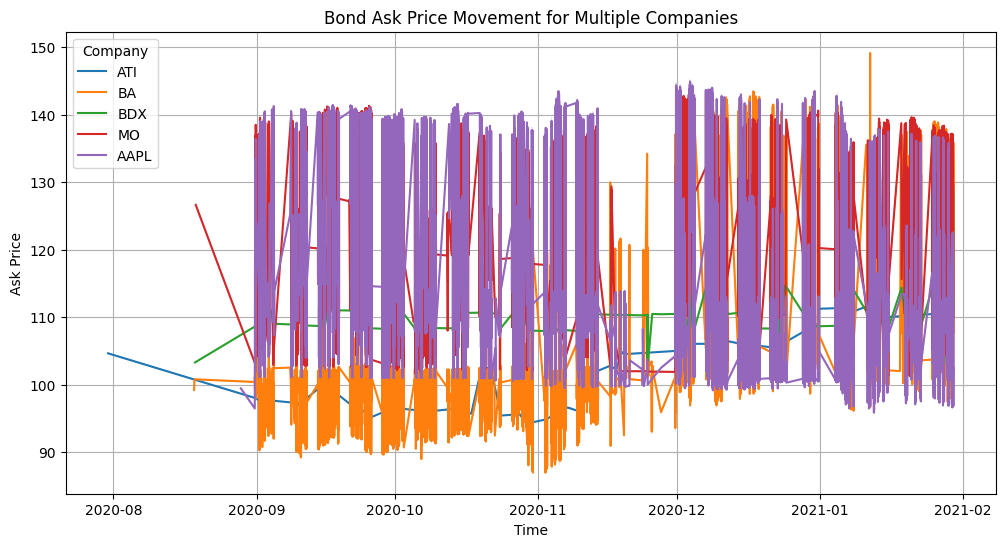

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# 选择要对比的公司（如前5个）
top_tickers = df['TICKER'].unique()[:5]
df_subset = df[df['TICKER'].isin(top_tickers)]

# 画出不同公司的 ASK 价格变化
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_subset, x=df_subset.TRIGGER_TIMESTAMP, y='ASK_PRICE', hue='TICKER')

# 添加标题和标签
plt.title("Bond Ask Price Movement for Multiple Companies")
plt.xlabel("Time")
plt.ylabel("Ask Price")
plt.legend(title="Company")
plt.grid(True)
plt.show()


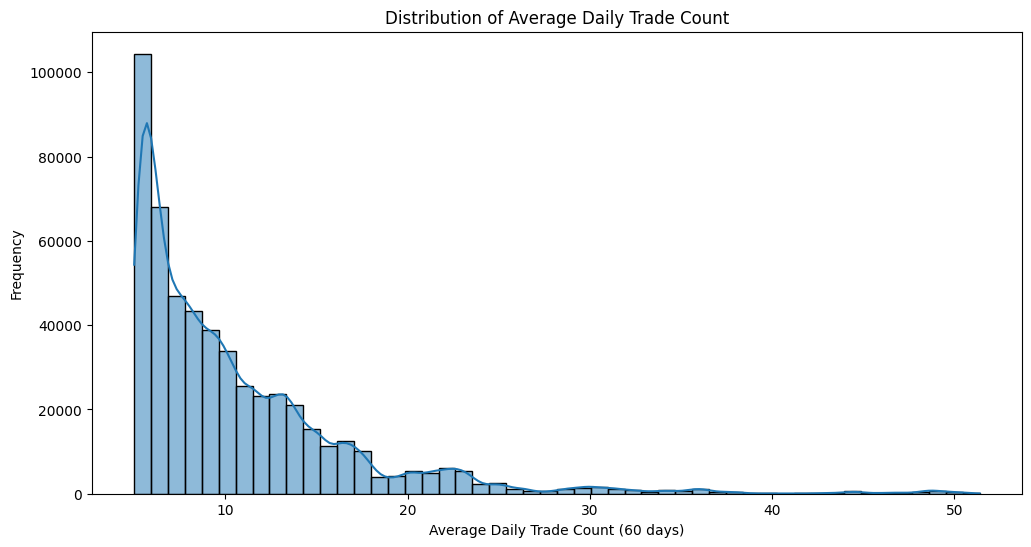

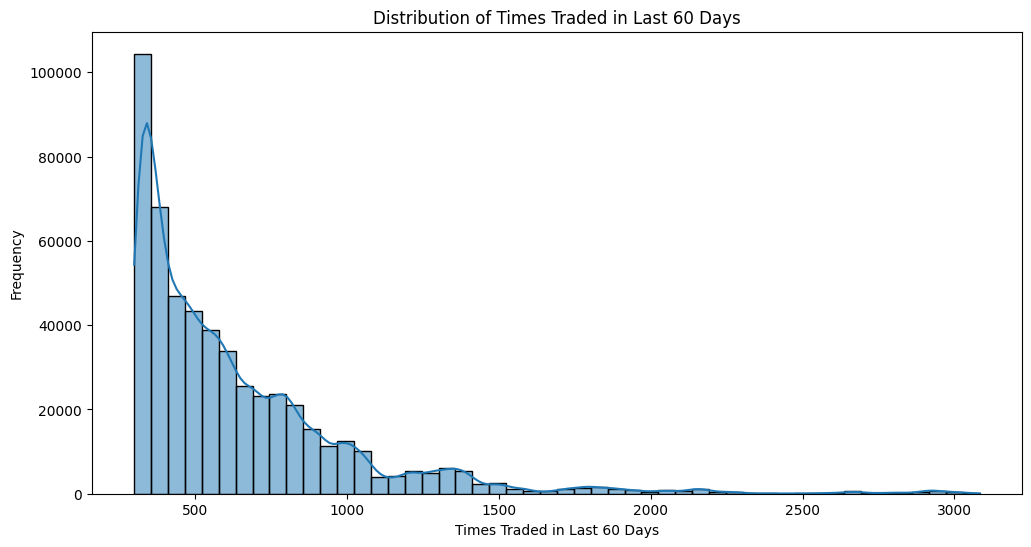

Trade Activity Level Distribution:
 Trade_Activity_Level
Inactive    264835
Active      264419
Name: count, dtype: int64
Recently Traded Bonds Analysis:
                       Category   Count  Percentage
0      Traded in Last 24 Hours       0         0.0
1  Not Traded in Last 24 Hours  529254       100.0


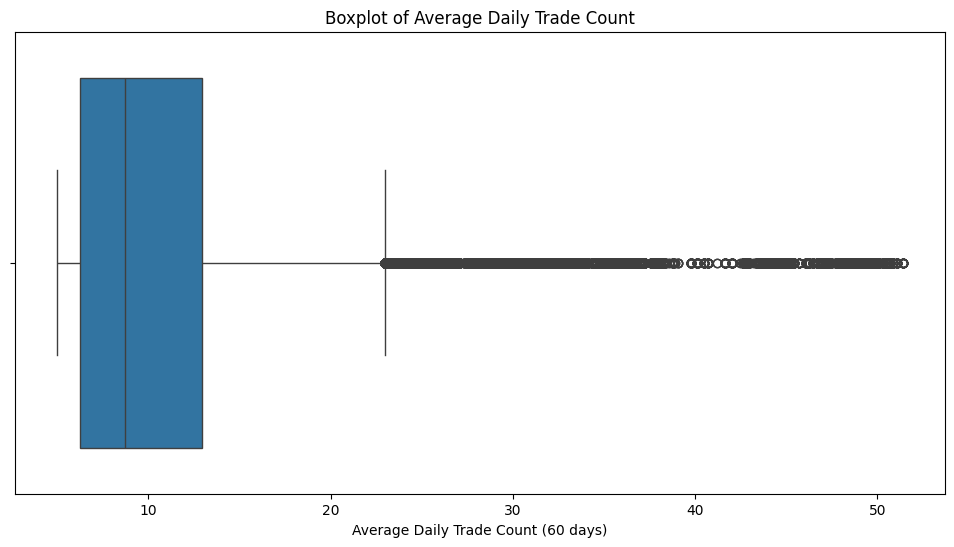

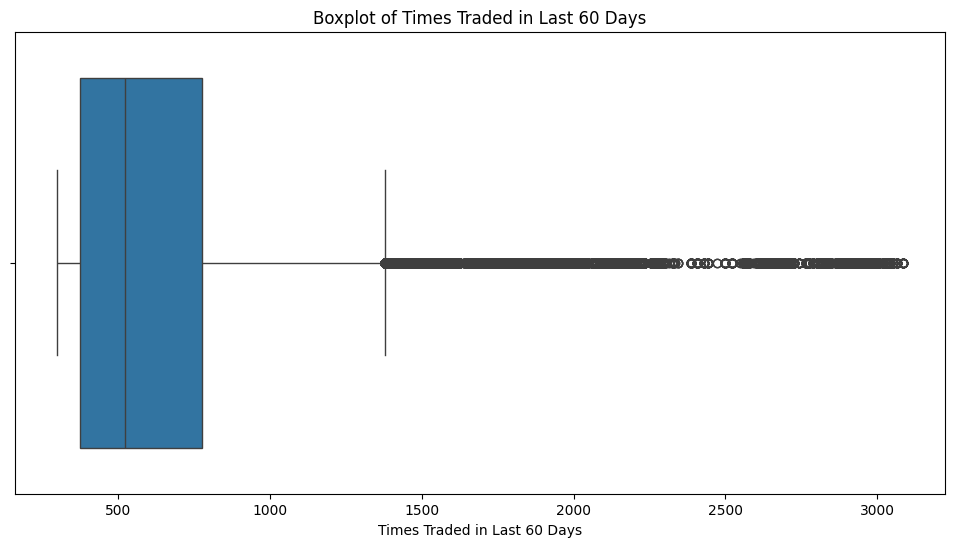

In [23]:
#EDA
#3.Trading activity data analysis

# （1）The distribution of AVG_DAILY_TRADE_COUNT_60
plt.figure(figsize=(12, 6))
sns.histplot(df['AVG_DAILY_TRADE_COUNT_60'], bins=50, kde=True)
plt.xlabel('Average Daily Trade Count (60 days)')
plt.ylabel('Frequency')
plt.title('Distribution of Average Daily Trade Count')
plt.show()

# （2）The distribution of TIMES_TRADED_60
plt.figure(figsize=(12, 6))
sns.histplot(df['TIMES_TRADED_60'], bins=50, kde=True)
plt.xlabel('Times Traded in Last 60 Days')
plt.ylabel('Frequency')
plt.title('Distribution of Times Traded in Last 60 Days')
plt.show()

# （3） "Active" or "Inactive" based on the median trade count
median_trade_count = df['AVG_DAILY_TRADE_COUNT_60'].median()
df['Trade_Activity_Level'] = df['AVG_DAILY_TRADE_COUNT_60'].apply(lambda x: 'Active' if x > median_trade_count else 'Inactive')

# （4）Display the distribution of active vs. inactive bonds
trade_activity_counts = df['Trade_Activity_Level'].value_counts()
print("Trade Activity Level Distribution:\n", trade_activity_counts)

# （5）Identify bonds traded within the last 24 hours)
recently_traded_count = df[df['TIME_SINCE_LAST_TRADE'] == '0-24'].shape[0]
total_bonds = df.shape[0]
recently_traded_percentage = (recently_traded_count / total_bonds) * 100

recently_traded_df = pd.DataFrame({
    "Category": ["Traded in Last 24 Hours", "Not Traded in Last 24 Hours"],
    "Count": [recently_traded_count, total_bonds - recently_traded_count],
    "Percentage": [recently_traded_percentage, 100 - recently_traded_percentage]
})

print("Recently Traded Bonds Analysis:\n", recently_traded_df)

# （6）Boxplot to visualize outliers in trade activity
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['AVG_DAILY_TRADE_COUNT_60'])
plt.xlabel('Average Daily Trade Count (60 days)')
plt.title('Boxplot of Average Daily Trade Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x=df['TIMES_TRADED_60'])
plt.xlabel('Times Traded in Last 60 Days')
plt.title('Boxplot of Times Traded in Last 60 Days')
plt.show()


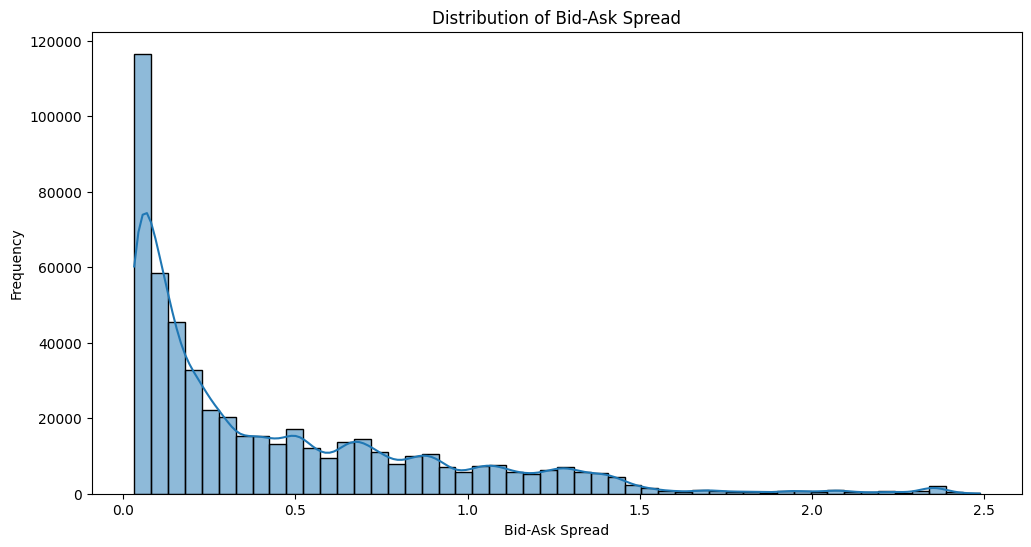

High Bid-Ask Spread Bonds:
      TICKER  BID_ASK_SPREAD
2249   DELL          2.2899
2250   DELL          2.2899
2251   DELL          2.2885
2252   DELL          2.2885
2281   DELL          2.2872


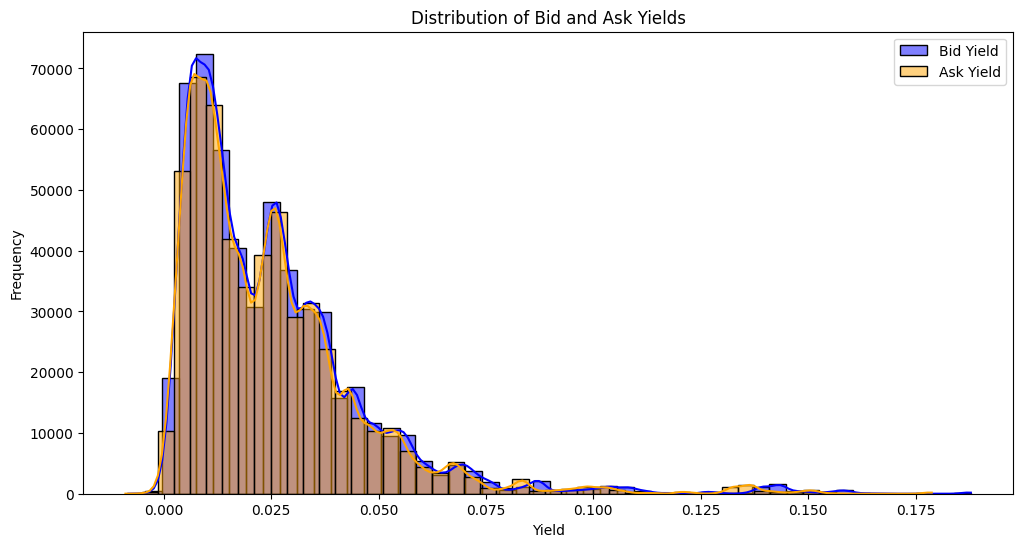

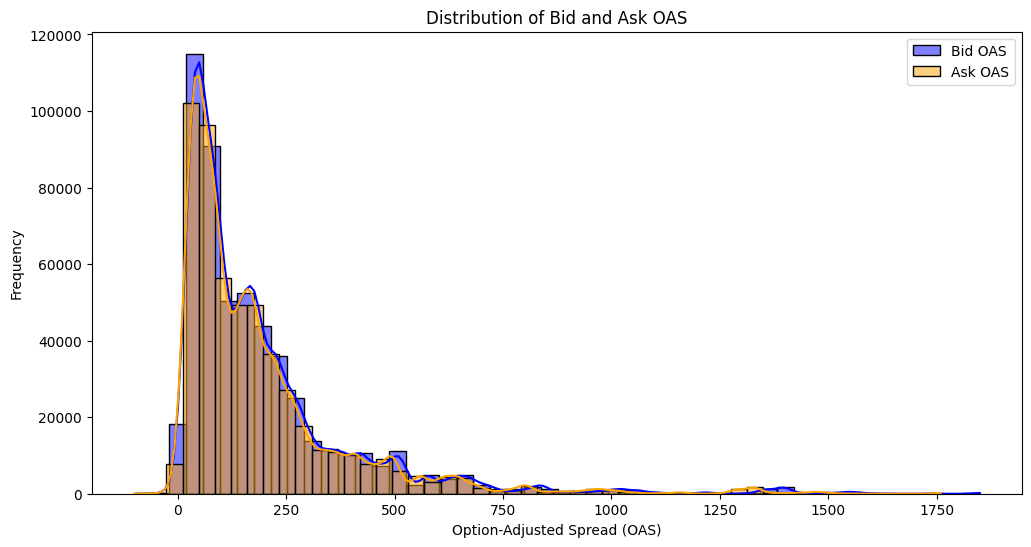

High OAS Bonds:
       TICKER      BID_OAS
2247  BBDBCN  1401.717338
2248  BBDBCN  1401.717338
2253  BBDBCN  1386.391996
2254  BBDBCN  1386.391996
2255  BBDBCN  1388.219583
Low OAS Bonds:
      TICKER    BID_OAS
3146     MO  15.311560
3147     MO  15.311560
3188   AAPL  10.877210
3189   AAPL  10.877210
3198   AAPL   2.748344


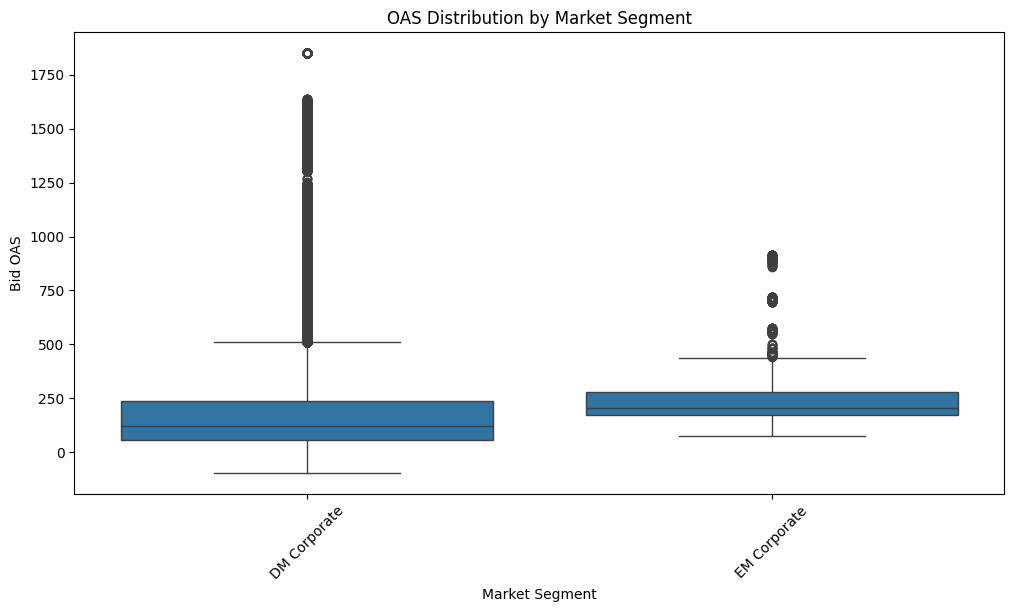

In [24]:
#4.Bond and Yield price Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate Bid-Ask Spread
df['BID_ASK_SPREAD'] = df['ASK_PRICE'] - df['BID_PRICE']

# （1）Distribution of Bid-Ask Spread
plt.figure(figsize=(12, 6))
sns.histplot(df['BID_ASK_SPREAD'], bins=50, kde=True)
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Bid-Ask Spread')
plt.show()

# Identify bonds with a large Bid-Ask Spread (above 95th percentile)
spread_threshold = df['BID_ASK_SPREAD'].quantile(0.95)
high_spread_bonds = df[df['BID_ASK_SPREAD'] > spread_threshold]

# Display high bid-ask spread bonds
print("High Bid-Ask Spread Bonds:\n", high_spread_bonds[['TICKER', 'BID_ASK_SPREAD']].head())

# （2）Distribution of Bid and Ask Yields
plt.figure(figsize=(12, 6))
sns.histplot(df['BID_YIELD'], bins=50, kde=True, label="Bid Yield", color='blue')
sns.histplot(df['ASK_YIELD'], bins=50, kde=True, label="Ask Yield", color='orange')
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.title('Distribution of Bid and Ask Yields')
plt.legend()
plt.show()

# （3）Distribution of Option-Adjusted Spread (OAS)
plt.figure(figsize=(12, 6))
sns.histplot(df['BID_OAS'], bins=50, kde=True, label="Bid OAS", color='blue')
sns.histplot(df['ASK_OAS'], bins=50, kde=True, label="Ask OAS", color='orange')
plt.xlabel('Option-Adjusted Spread (OAS)')
plt.ylabel('Frequency')
plt.title('Distribution of Bid and Ask OAS')
plt.legend()
plt.show()

# （4）Identify bonds with high and low OAS (95th and 5th percentiles)
oas_threshold_high = df['BID_OAS'].quantile(0.95)
oas_threshold_low = df['BID_OAS'].quantile(0.05)

high_oas_bonds = df[df['BID_OAS'] > oas_threshold_high]
low_oas_bonds = df[df['BID_OAS'] < oas_threshold_low]

print("High OAS Bonds:\n", high_oas_bonds[['TICKER', 'BID_OAS']].head())
print("Low OAS Bonds:\n", low_oas_bonds[['TICKER', 'BID_OAS']].head())

# （5）Analyze OAS distribution across different market segments
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['MARKET_SEGMENT'], y=df['BID_OAS'])
plt.xlabel('Market Segment')
plt.ylabel('Bid OAS')
plt.title('OAS Distribution by Market Segment')
plt.xticks(rotation=45)
plt.show()


<ipython-input-29-8c0ee1c1c7a7>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette="Blues_r")


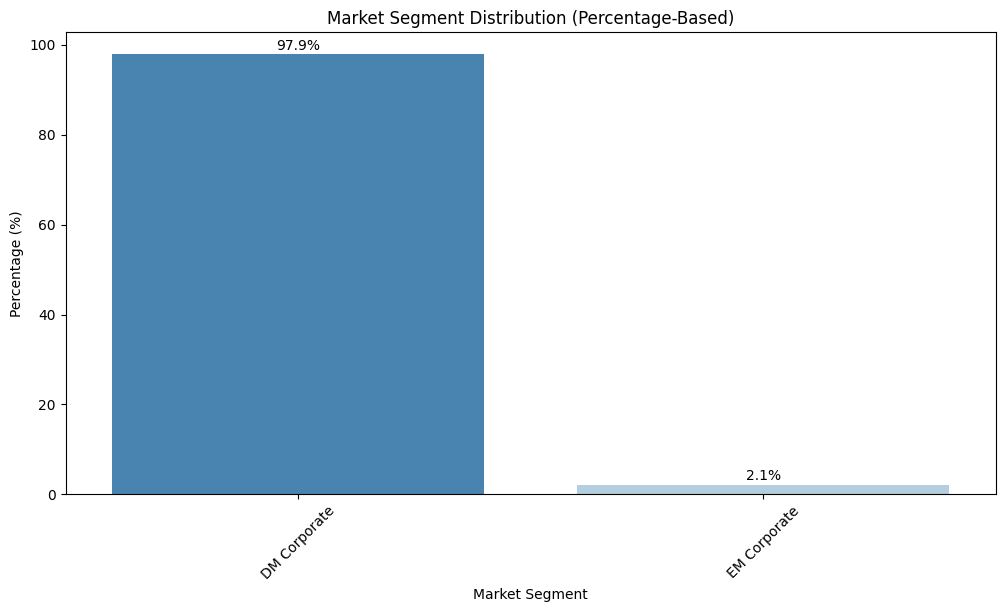

Coupon Type and Bid Yield Summary:
                        count      mean       std       min       25%      50%  \
COUPON_TYPE                                                                     
Fixed Coupon        526960.0  0.025356  0.021893 -0.008220  0.010033  0.02009   
Fixed Rate Stepper    2294.0  0.034462  0.007174  0.014684  0.031143  0.03605   

                         75%       max  
COUPON_TYPE                             
Fixed Coupon        0.033965  0.187858  
Fixed Rate Stepper  0.039371  0.059485  
ANOVA Test Result (F-statistic: 396.69, p-value: 0.0000)


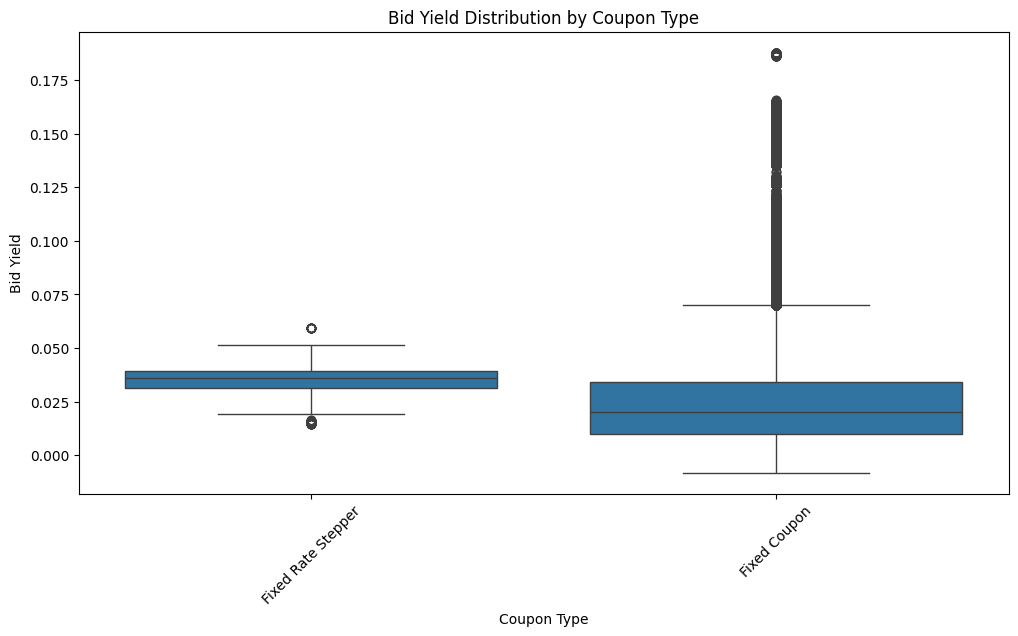

Market Segment and Bid Yield Summary:
                    count      mean       std       min       25%       50%  \
MARKET_SEGMENT                                                               
DM Corporate    518198.0  0.025309  0.022002 -0.008220  0.009909  0.019774   
EM Corporate     11056.0  0.029486  0.012859  0.009943  0.020549  0.027138   

                     75%       max  
MARKET_SEGMENT                      
DM Corporate    0.034038  0.187858  
EM Corporate    0.036240  0.092977  


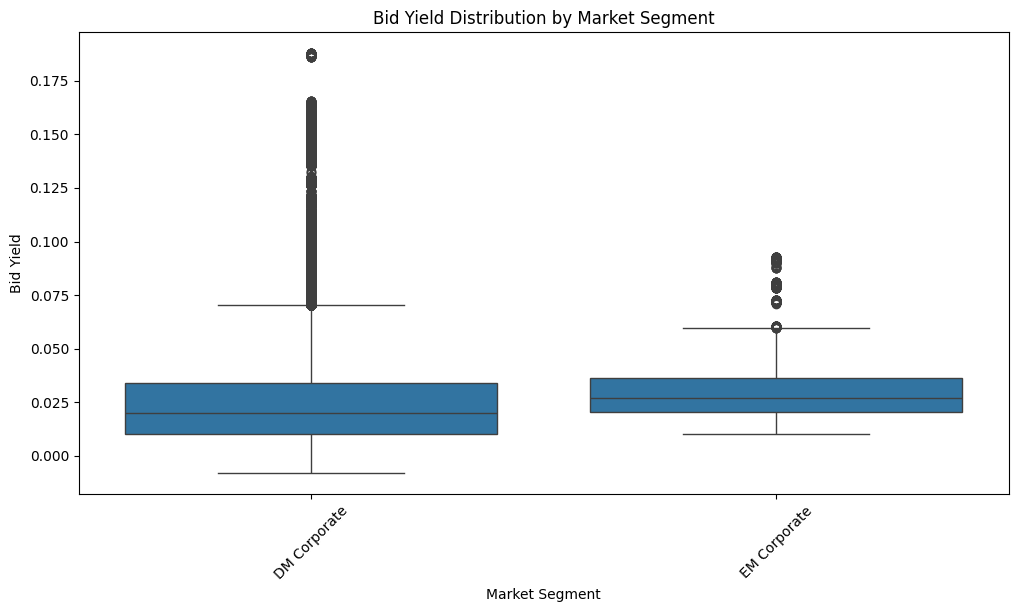

In [29]:
#5. Market Distribution & Group Analysis

from scipy.stats import f_oneway

# (1) Market Segmentation Analysis
# Computes the percentage distribution of MARKET_SEGMENT categories (e.g., DM Corporate, EM Sovereign)
market_segment_counts = df['MARKET_SEGMENT'].value_counts(normalize=True) * 100

plt.figure(figsize=(12, 6))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values, palette="Blues_r")

# Set labels and titles
plt.xticks(rotation=45)
plt.xlabel("Market Segment")
plt.ylabel("Percentage (%)")
plt.title("Market Segment Distribution (Percentage-Based)")

# Annotate percentage values on bars for clarity
for index, value in enumerate(market_segment_counts.values):
    plt.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

plt.show()

# (2) Statistical Summary of BID_YIELD by COUPON_TYPE
# Computes descriptive statistics (mean, min, max, std, etc.) of BID_YIELD for each COUPON_TYPE
coupon_summary = df.groupby('COUPON_TYPE')['BID_YIELD'].describe()
print("Coupon Type and Bid Yield Summary:\n", coupon_summary)

# (3) ANOVA Test: Checking if COUPON_TYPE significantly affects BID_YIELD
# This compares BID_YIELD distributions across different COUPON_TYPE categories
bid_yield_groups = [df[df['COUPON_TYPE'] == ct]['BID_YIELD'].dropna()
                     for ct in df['COUPON_TYPE'].unique() if len(df[df['COUPON_TYPE'] == ct]) > 1]

if len(bid_yield_groups) > 1:
    anova_result = f_oneway(*bid_yield_groups)
    print(f"ANOVA Test Result (F-statistic: {anova_result.statistic:.2f}, p-value: {anova_result.pvalue:.4f})")
else:
    print("Not enough data for ANOVA test on coupon types.")

# (4) Boxplot of BID_YIELD by COUPON_TYPE
# Helps visualize yield differences across COUPON_TYPE categories
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='COUPON_TYPE', y='BID_YIELD')
plt.xticks(rotation=45)
plt.xlabel("Coupon Type")
plt.ylabel("Bid Yield")
plt.title("Bid Yield Distribution by Coupon Type")
plt.show()

# (5) Statistical Summary of BID_YIELD by MARKET_SEGMENT
# Computes descriptive statistics of BID_YIELD for each MARKET_SEGMENT
segment_summary = df.groupby('MARKET_SEGMENT')['BID_YIELD'].describe()
print("Market Segment and Bid Yield Summary:\n", segment_summary)

# (6) Boxplot of BID_YIELD by MARKET_SEGMENT
# Helps visualize yield differences across different market segments
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MARKET_SEGMENT', y='BID_YIELD')
plt.xticks(rotation=45)
plt.xlabel("Market Segment")
plt.ylabel("Bid Yield")
plt.title("Bid Yield Distribution by Market Segment")
plt.show()


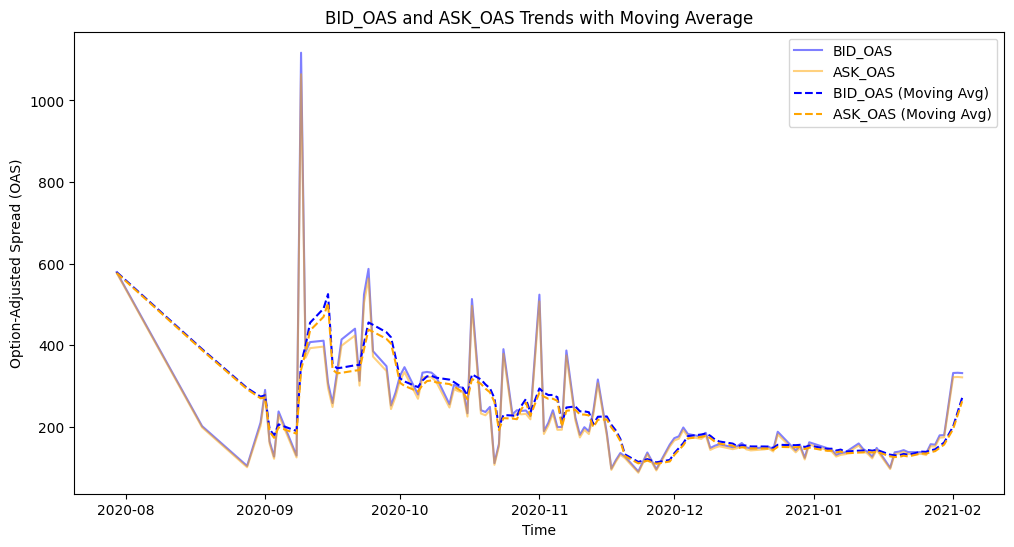

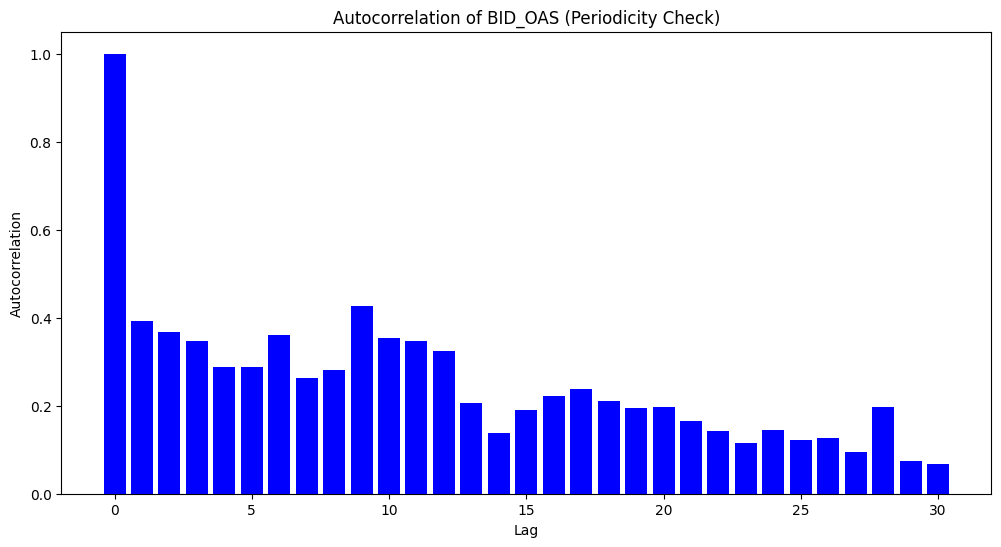

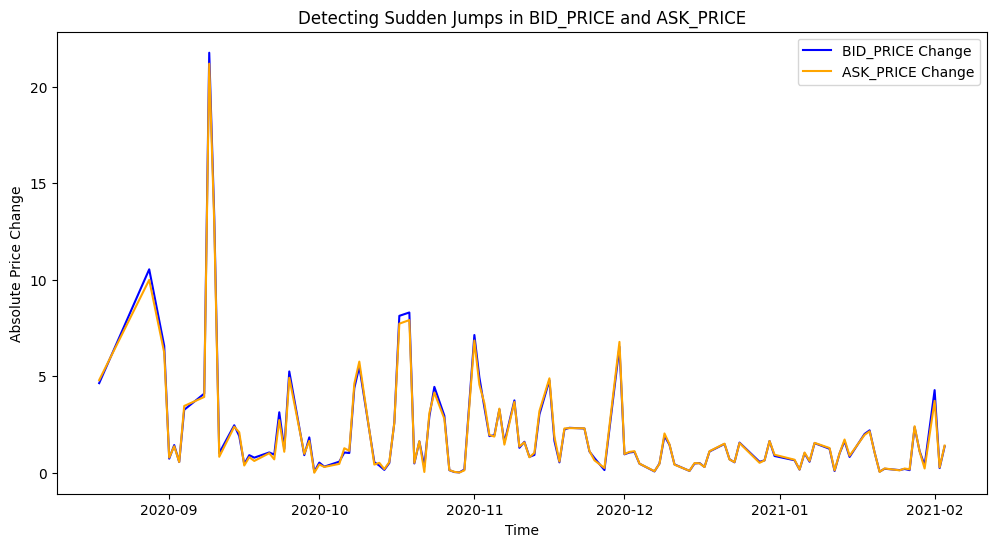

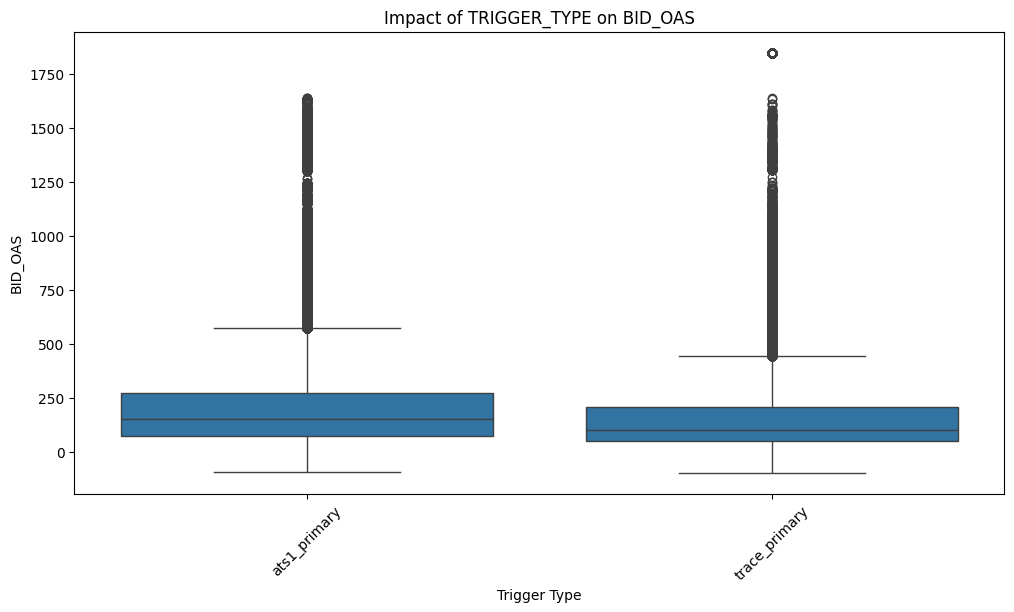

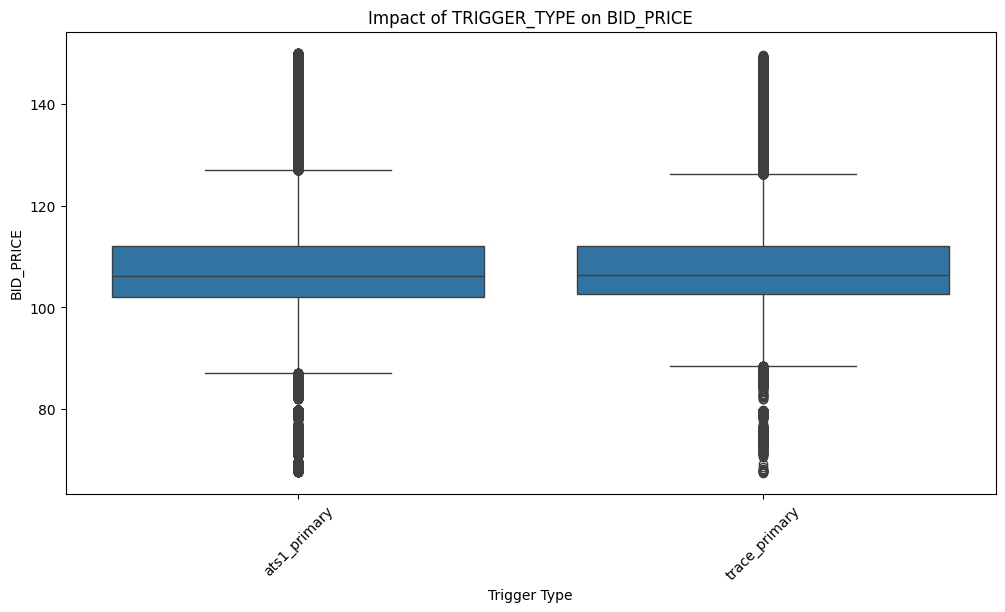

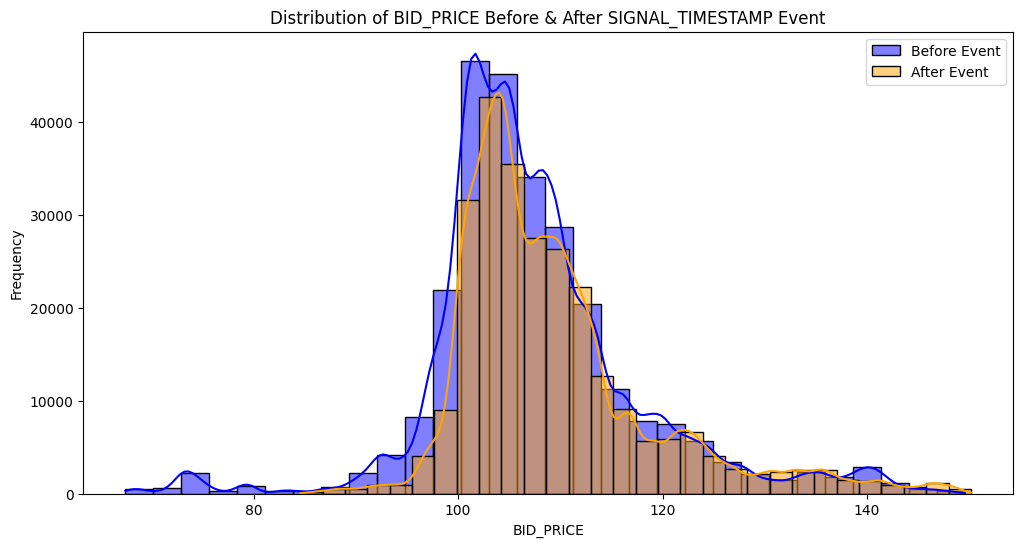

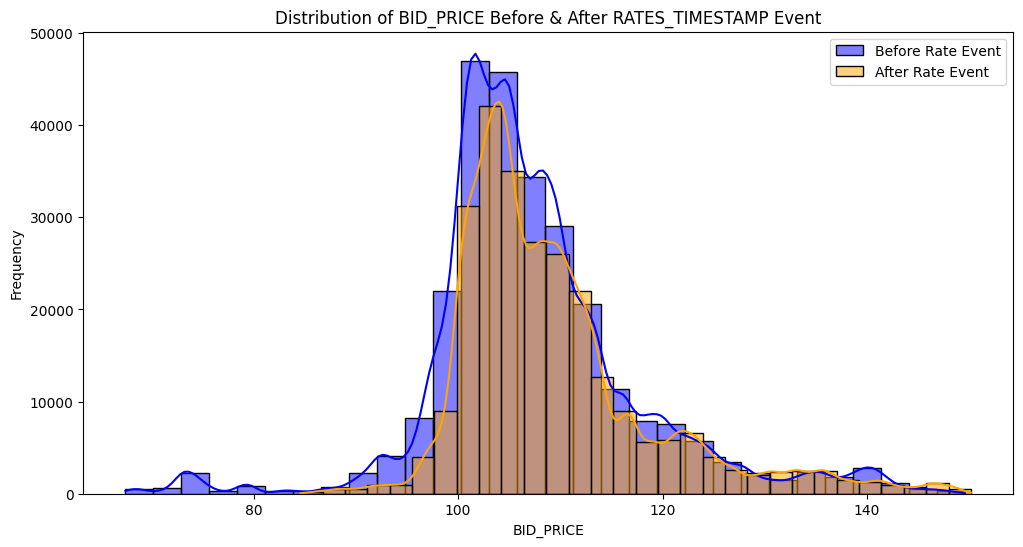

In [38]:
#6. Time Series Analysis

from scipy.stats import f_oneway
from scipy.fft import fft
from statsmodels.tsa.stattools import acf

# Prepare dataset for time series analysis
# Selecting numerical columns and resampling them based on TRIGGER_TIMESTAMP
numeric_cols = df.select_dtypes(include=['number']).columns
resampling_cols = list(numeric_cols) + ['TRIGGER_TIMESTAMP']
df_sampled = df[resampling_cols].resample('D', on='TRIGGER_TIMESTAMP').mean().dropna()

# (1) BID_OAS & ASK_OAS Time Series Trends
# Observing how credit spreads change over time
df_sampled['BID_OAS'] = pd.to_numeric(df_sampled['BID_OAS'], errors='coerce')
df_sampled['ASK_OAS'] = pd.to_numeric(df_sampled['ASK_OAS'], errors='coerce')
df_sampled.dropna(subset=['BID_OAS', 'ASK_OAS'], inplace=True)

df_sampled['BID_OAS_MA'] = df_sampled['BID_OAS'].rolling(window=5, min_periods=1).mean()
df_sampled['ASK_OAS_MA'] = df_sampled['ASK_OAS'].rolling(window=5, min_periods=1).mean()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='BID_OAS', label="BID_OAS", color='blue', alpha=0.5)
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='ASK_OAS', label="ASK_OAS", color='orange', alpha=0.5)
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='BID_OAS_MA', label="BID_OAS (Moving Avg)", color='blue', linestyle="dashed")
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='ASK_OAS_MA', label="ASK_OAS (Moving Avg)", color='orange', linestyle="dashed")
plt.xlabel("Time")
plt.ylabel("Option-Adjusted Spread (OAS)")
plt.title("BID_OAS and ASK_OAS Trends with Moving Average")
plt.legend()
plt.show()

# (2) Detecting Periodicity in Credit Spreads (ACF Analysis)
# Compute Autocorrelation Function (ACF) for periodicity detection
acf_values = acf(df_sampled['BID_OAS'], nlags=30)

plt.figure(figsize=(12, 6))
plt.bar(range(len(acf_values)), acf_values, color='blue')
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of BID_OAS (Periodicity Check)")
plt.show()

# (3) Detecting Price Trends and Sudden Changes (BID_PRICE & ASK_PRICE)
# Identifying significant price jumps by calculating absolute differences
df_sampled['BID_PRICE'] = pd.to_numeric(df_sampled['BID_PRICE'], errors='coerce')
df_sampled['ASK_PRICE'] = pd.to_numeric(df_sampled['ASK_PRICE'], errors='coerce')
df_sampled.dropna(subset=['BID_PRICE', 'ASK_PRICE'], inplace=True)

df_sampled['BID_PRICE_CHANGE'] = df_sampled['BID_PRICE'].diff().abs()
df_sampled['ASK_PRICE_CHANGE'] = df_sampled['ASK_PRICE'].diff().abs()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='BID_PRICE_CHANGE', label="BID_PRICE Change", color='blue')
sns.lineplot(data=df_sampled, x='TRIGGER_TIMESTAMP', y='ASK_PRICE_CHANGE', label="ASK_PRICE Change", color='orange')
plt.xlabel("Time")
plt.ylabel("Absolute Price Change")
plt.title("Detecting Sudden Jumps in BID_PRICE and ASK_PRICE")
plt.legend()
plt.show()

# (4) Impact of TRIGGER_TYPE on BID_PRICE & BID_OAS
# Analyzing how different trigger events influence credit spreads and prices
if 'TRIGGER_TYPE' in df.columns and df['TRIGGER_TYPE'].nunique() > 1:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='TRIGGER_TYPE', y='BID_OAS')
    plt.xticks(rotation=45)
    plt.xlabel("Trigger Type")
    plt.ylabel("BID_OAS")
    plt.title("Impact of TRIGGER_TYPE on BID_OAS")
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='TRIGGER_TYPE', y='BID_PRICE')
    plt.xticks(rotation=45)
    plt.xlabel("Trigger Type")
    plt.ylabel("BID_PRICE")
    plt.title("Impact of TRIGGER_TYPE on BID_PRICE")
    plt.show()
else:
    print("Not enough variation in TRIGGER_TYPE for meaningful analysis.")

# (5) Impact of SIGNAL_TIMESTAMP Events on BID_PRICE
# Comparing BID_PRICE before and after SIGNAL_TIMESTAMP events
event_time = df['SIGNAL_TIMESTAMP'].median()
pre_event = df[df['TRIGGER_TIMESTAMP'] < event_time]['BID_PRICE']
post_event = df[df['TRIGGER_TIMESTAMP'] >= event_time]['BID_PRICE']

plt.figure(figsize=(12, 6))
sns.histplot(pre_event, label="Before Event", color='blue', kde=True, bins=30)
sns.histplot(post_event, label="After Event", color='orange', kde=True, bins=30)
plt.xlabel("BID_PRICE")
plt.ylabel("Frequency")
plt.title("Distribution of BID_PRICE Before & After SIGNAL_TIMESTAMP Event")
plt.legend()
plt.show()

# (6) Impact of RATES_TIMESTAMP Events on BID_PRICE
# Comparing BID_PRICE before and after RATES_TIMESTAMP events
if 'RATES_TIMESTAMP' in df.columns:
    rate_event_time = df['RATES_TIMESTAMP'].median()
    pre_rate_event = df[df['TRIGGER_TIMESTAMP'] < rate_event_time]['BID_PRICE']
    post_rate_event = df[df['TRIGGER_TIMESTAMP'] >= rate_event_time]['BID_PRICE']

    plt.figure(figsize=(12, 6))
    sns.histplot(pre_rate_event, label="Before Rate Event", color='blue', kde=True, bins=30)
    sns.histplot(post_rate_event, label="After Rate Event", color='orange', kde=True, bins=30)
    plt.xlabel("BID_PRICE")
    plt.ylabel("Frequency")
    plt.title("Distribution of BID_PRICE Before & After RATES_TIMESTAMP Event")
    plt.legend()
    plt.show()
else:
    print("RATES_TIMESTAMP column is missing, skipping rate impact analysis.")
